In [252]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [253]:
# y = 4x+6 #정답 >> 답을 찾아가는지 찾으려고..
X = 2 * np.random.rand(100,1) #100행에 1열 (한 행에 하나씩이니까)
y = 6 + 4 * X + np.random.randn(100,1) #np ~~ 는 노이즈..

In [254]:
X[:2]

array([[1.09762701],
       [1.43037873]])

In [255]:
y[:2]

array([[ 9.22535819],
       [12.62234142]])

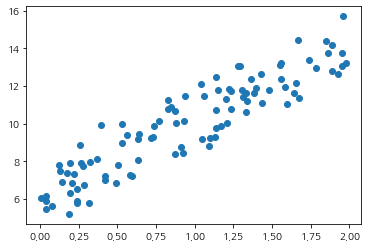

In [256]:
plt.scatter(X, y)

In [257]:
#비용함수 : 실제값 예측값 차이 계산하는 함수
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [251]:
def get_weight_update(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X,w1.T) + w0 #T : 행렬바꾸는거.. 
    diff = y-y_pred #y(정답) - y~(예측) = 차이
    w0_factors = np.ones((N, 1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [222]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for i in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update # -하는이유 : 양의 값 나오면 빼기, 음의 값 나오면 더하기되서..
        w0 = w0 - w0_update
        
    return w1, w0

In [223]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(w1, w0)

[[3.91347883]] [[5.97387348]]


In [224]:
pred = X*w1[0,0]+w0

In [225]:
pred[:2]

array([[11.17248517],
       [12.00382835]])

In [48]:
y[:2]

array([[ 9.22535819],
       [12.62234142]])

In [49]:
# 321p. 바이어스 = 인터셉트  . coef_ = 회귀계수
